C:\Users\willi\AppData\Local\Temp\ipykernel_29616\4061148570.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", start="2020-01-01", end="2025-09-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2020-01-01 to 2025-08-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2070 non-null   float64
 1   (High, BTC-USD)    2070 non-null   float64
 2   (Low, BTC-USD)     2070 non-null   float64
 3   (Open, BTC-USD)    2070

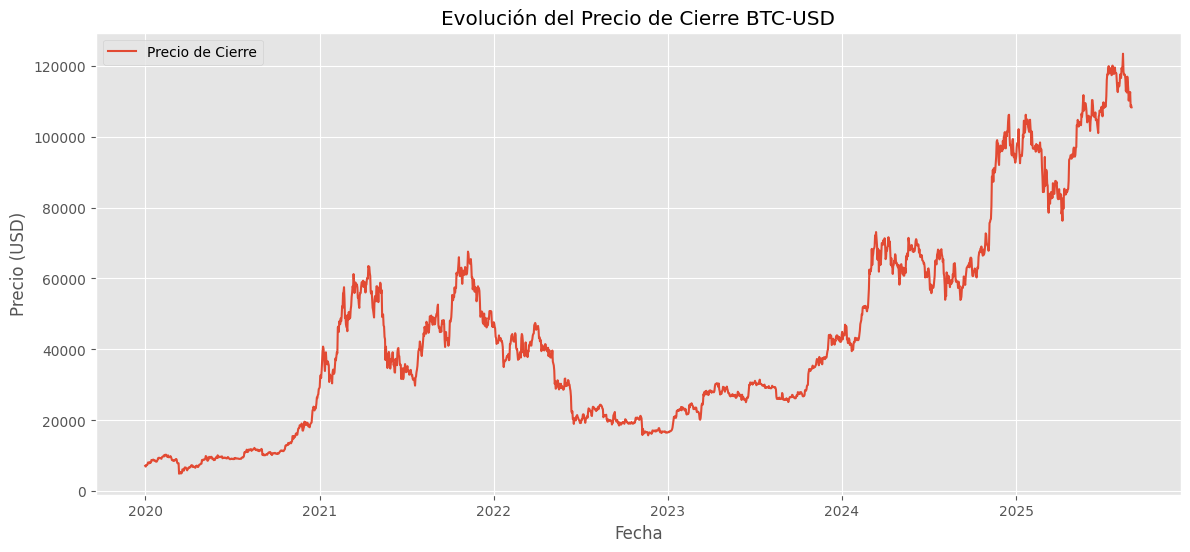

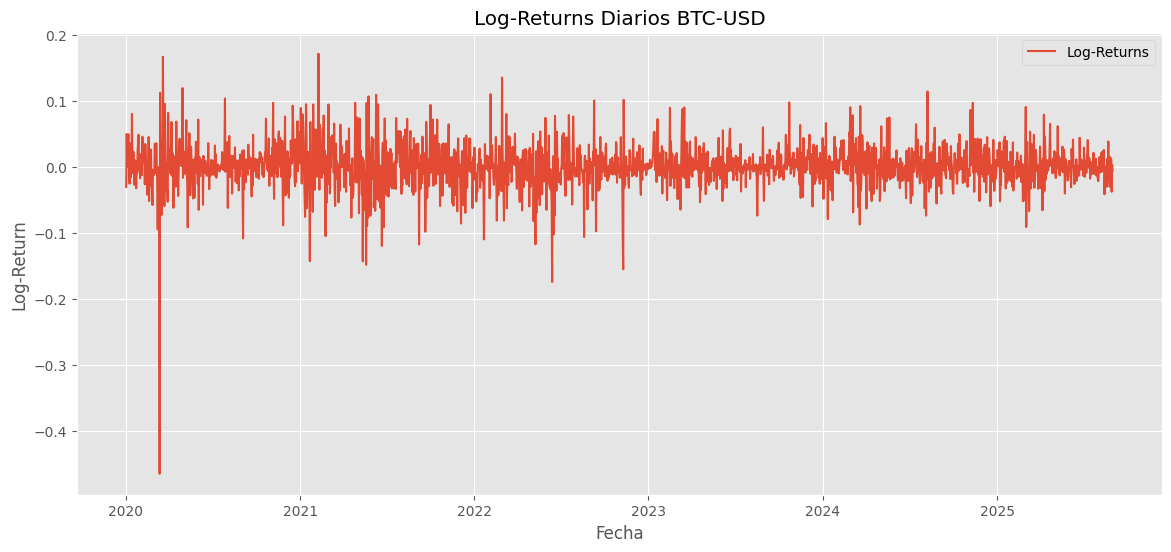

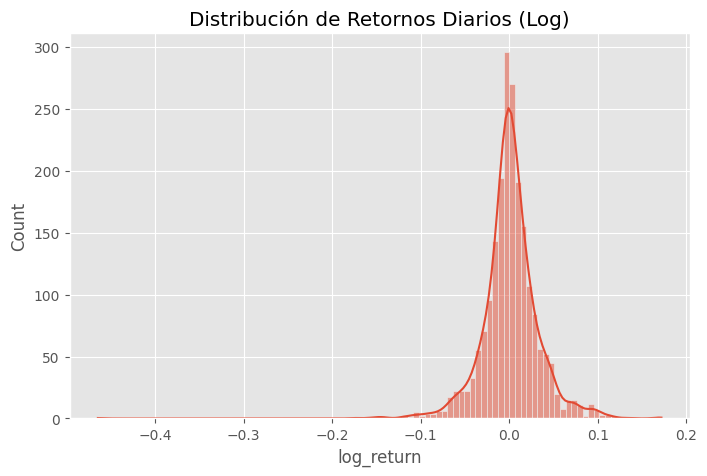

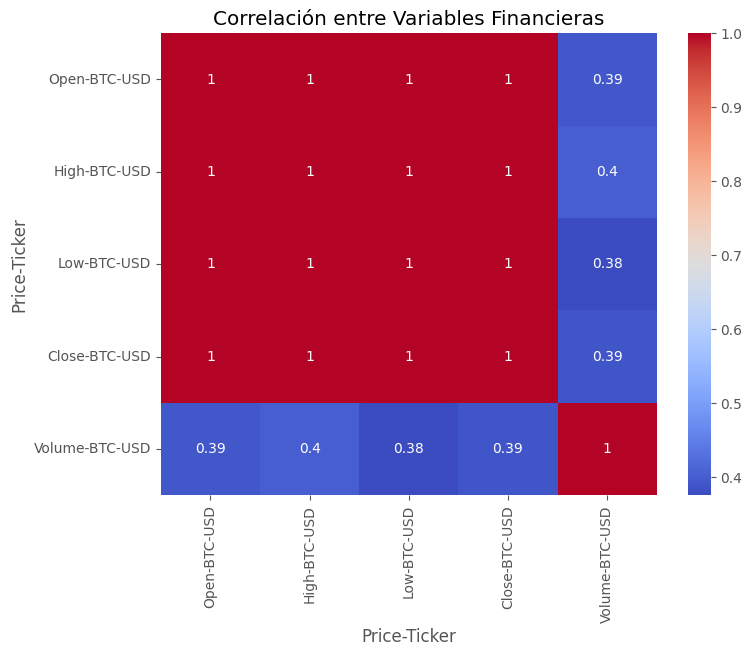

In [5]:
# ==========================================
# Análisis Exploratorio de Datos - Bitcoin
# ==========================================

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Configuración de visualización
pd.set_option('display.max_columns', None)
plt.style.use("ggplot")

# 2. Descargar datos desde Yahoo Finance
# BTC-USD, últimos 5 años como ejemplo
df = yf.download("BTC-USD", start="2020-01-01", end="2025-09-01", interval="1d")

# Guardar dataset crudo para reproducibilidad
df.to_csv("../data_raw/btc_usd_raw.csv")

# 3. Vista inicial de los datos
print(df.head())
print(df.info())
print(df.describe())

# 4. Chequear missing values
print(df.isna().sum())

# 5. Visualización básica
plt.figure(figsize=(14,6))
plt.plot(df.index, df["Close"], label="Precio de Cierre")
plt.title("Evolución del Precio de Cierre BTC-USD")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

# 6. Retornos diarios
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

plt.figure(figsize=(14,6))
plt.plot(df.index, df["log_return"], label="Log-Returns")
plt.title("Log-Returns Diarios BTC-USD")
plt.xlabel("Fecha")
plt.ylabel("Log-Return")
plt.legend()
plt.show()

# 7. Histograma de retornos
plt.figure(figsize=(8,5))
sns.histplot(df["log_return"].dropna(), bins=100, kde=True)
plt.title("Distribución de Retornos Diarios (Log)")
plt.show()

# 8. Matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df[["Open","High","Low","Close","Volume"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre Variables Financieras")
plt.show()


In [21]:

print(df.columns.tolist())

#  Renombrar columnas para mayor claridad
df.rename(columns={
    'C': 'Close',
    'H': 'High',
    'L': 'Low',
    'O': 'Open',
    'V': 'Volume'
}, inplace=True)

print(df[['Open','High','Low','Close','Volume']].head())

['P', 'Close', 'High', 'Low', 'Open', 'Volume']
                  Open              High               Low             Close  \
Date                                                                           
0              BTC-USD           BTC-USD           BTC-USD           BTC-USD   
1                  NaN               NaN               NaN               NaN   
2     7194.89208984375  7254.33056640625   7174.9443359375  7200.17431640625   
3     7202.55126953125   7212.1552734375  6935.27001953125  6985.47021484375   
4      6984.4287109375  7413.71533203125     6914.99609375  7344.88427734375   

           Volume  
Date               
0         BTC-USD  
1             NaN  
2     18565664997  
3     20802083465  
4     28111481032  


In [22]:
# Si el DataFrame vino con MultiIndex en columnas
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]


In [32]:
# ==========================================
# Análisis Exploratorio de Datos - Bitcoin
# ==========================================

# Suponemos que df ya fue descargado y guardado
# Trabajamos sobre una copia para no modificar los datos crudos
df_clean = df.copy()

# ---------------------------
# 1. Convertir columnas a numérico
# ---------------------------
for col in ['Open','High','Low','Close','Volume']:
    df_clean.loc[:, col] = pd.to_numeric(df_clean[col], errors='coerce')

# ---------------------------
# 2. Eliminar filas con NaN
# ---------------------------
df_clean = df_clean.dropna(subset=['Open','High','Low','Close','Volume'])

# ---------------------------
# 3. Revisar duplicados
# ---------------------------
print("Duplicados:", df_clean.duplicated().sum())

# ---------------------------
# 4. Valores negativos
# ---------------------------
print("Precios negativos:\n", (df_clean[['Open','High','Low','Close']] < 0).sum())
print("Volumen negativo:", (df_clean['Volume'] < 0).sum())

# ---------------------------
# 5. Estadísticas descriptivas
# ---------------------------
print(df_clean.describe())

# ---------------------------
# 6. Retornos diarios
# ---------------------------
df_clean['log_return'] = np.log(df_clean['Close'] / df_clean['Close'].shift(1))


Duplicados: 0
Precios negativos:
 Open     0
High     0
Low      0
Close    0
dtype: int64
Volumen negativo: 0
               Close           High            Low           Open  \
count    2070.000000    2070.000000    2070.000000    2070.000000   
mean    43900.678892   44744.801103   42925.008091   43853.962166   
std     29015.696564   29469.958123   28494.832841   28993.155859   
min      4970.788086    5331.833984    4106.980957    5002.578125   
25%     21086.105957   21487.168457   20576.609863   21042.340820   
50%     37711.265625   38709.236328   36536.310547   37652.705078   
75%     60921.171875   62350.801758   59834.026367   60888.247070   
max    123344.062500  124457.117188  118959.195312  123339.398438   

             Volume  
count  2.070000e+03  
mean   3.511325e+10  
std    2.063987e+10  
min    5.331173e+09  
25%    2.137778e+10  
50%    3.113782e+10  
75%    4.336565e+10  
max    3.509679e+11  


In [33]:
# Matriz de correlación de precios
corr_matrix = df_clean[['Open','High','Low','Close','Volume']].corr()

# Encontrar pares con correlación = 1 (exceptuando la diagonal)
redundant_cols = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) == 1:
            redundant_cols.append(corr_matrix.columns[i])

print("Columnas redundantes a eliminar:", redundant_cols)

# Eliminar columnas redundantes si existieran
df_clean.drop(columns=redundant_cols, inplace=True)


Columnas redundantes a eliminar: []


In [34]:
# Revisar duplicados
print("Duplicados antes de eliminar:", df_clean.duplicated().sum())

# Eliminación
df_clean = df_clean.drop_duplicates()

print("Duplicados después de eliminar:", df_clean.duplicated().sum())


Duplicados antes de eliminar: 0
Duplicados después de eliminar: 0


In [35]:
# Función para detectar outliers por columna
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Revisar outliers en precios y volumen
for col in ['Open','High','Low','Close','Volume']:
    outliers = detect_outliers_iqr(df_clean, col)
    print(f"{col}: {len(outliers)} outliers detectados")


Open: 1 outliers detectados
High: 2 outliers detectados
Low: 2 outliers detectados
Close: 1 outliers detectados
Volume: 84 outliers detectados


In [36]:
# ==========================================
# Winsorizing: limitar outliers al percentil 1 y 99
# ==========================================

# Columnas a aplicar winsorizing
cols_to_winsor = ['Open', 'High', 'Low', 'Close', 'Volume']

# Limites percentiles
lower_percentile = 0.01
upper_percentile = 0.99

df_winsor = df_clean.copy()

for col in cols_to_winsor:
    lower = df_winsor[col].quantile(lower_percentile)
    upper = df_winsor[col].quantile(upper_percentile)
    df_winsor[col] = df_winsor[col].clip(lower, upper)
    print(f"{col}: recortado a [{lower:.2f}, {upper:.2f}]")

# Revisar estadísticos tras winsorizing
print(df_winsor.describe())


Open: recortado a [6732.49, 117566.09]
High: recortado a [6889.69, 118859.13]
Low: recortado a [6579.97, 116560.76]
Close: recortado a [6728.13, 117553.85]
Volume: recortado a [7902157552.05, 104070782685.23]
               Close           High            Low           Open  \
count    2070.000000    2070.000000    2070.000000    2070.000000   
mean    43894.827750   44734.392198   42925.082432   43848.227906   
std     28971.049890   29419.788717   28458.816643   28948.735386   
min      6728.133706    6889.691108    6579.970757    6732.494780   
25%     21086.105957   21487.168457   20576.609863   21042.340820   
50%     37711.265625   38709.236328   36536.310547   37652.705078   
75%     60921.171875   62350.801758   59834.026367   60888.247070   
max    117553.848281  118859.128516  116560.755156  117566.092109   

             Volume   log_return  
count  2.070000e+03  2069.000000  
mean   3.484854e+10     0.001310  
std    1.876821e+10     0.032949  
min    7.902158e+09    -0.464

In [ ]:
from sklearn.preprocessing import RobustScaler

# Definimos las columnas numéricas
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Creamos el escalador
scaler = RobustScaler()

# Aplicamos el escalado SOLO a las columnas numéricas
X_scaled = scaler.fit_transform(df[numeric_cols])

# Lo volvemos DataFrame para verlo bonito
import pandas as pd
df_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=df.index)

print("Shape después del escalado:", df_scaled.shape)
print(df_scaled.head())


ValueError: could not convert string to float: '2020-01-01'